# Statistic 12-04-2017

In [1]:
import pickle       # (De-) Serialization
%pylab inline       
import pylab as plt # plot
import pandas

Populating the interactive namespace from numpy and matplotlib


## Used TestFiles

In [2]:
testfiles = [f.split('/')[-1][2:] for f in pickle.load(open('./test_files.pkl','rb'))]

In [3]:
len(testfiles)

199

## Data

In [4]:
predicted = pickle.load(open('./predicted.pkl', 'rb'))

In [5]:
real = pickle.load(open('./real.pkl', 'rb'))

## Scoring per File

In [6]:
db = pickle.load(open('./databuilder.pkl', 'rb'))

In [7]:
from sklearn import metrics

For Definition of accuracy, f1-score, precision and recall see http://scikit-learn.org/stable/modules/model_evaluation.html

In [8]:
res = []
for i in range(len(predicted)):
    r = real[i]
    p = predicted[i]
    l = np.unique(real[0])
    acc = metrics.accuracy_score(y_true=r, y_pred=p)
    f1 = metrics.f1_score(labels=l, y_true=r, y_pred=p, average=None) # average=None -> get score for each label
    prec = metrics.precision_score(labels=l, y_true=r, y_pred=p, average=None)
    rec = metrics.recall_score(labels=l, y_true=r, y_pred=p, average=None)
    
    f1_all = np.ones(len(db.labels))*(-1)
    f1_all[l] = f1
    prec_all = np.ones(len(db.labels))*(-1)
    prec_all[l] = prec
    rec_all = np.ones(len(db.labels))*(-1)
    rec_all[l] = rec
    res.append([acc, np.mean(f1), np.mean(prec), np.mean(rec), *f1_all, *prec_all, *rec_all])
res = np.array(res)

C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


- Warning occurs because some labels are not in the document, so it is dividing by zero
- to get a value per label, these labels which aren't in the document there is a **-1**

In [9]:
score_labels = lambda x : ['{}_{}'.format(x, l) for l in db.labels]

In [10]:
cols = ['accuracy', 'mean(f1)', 'mean(prec)', 'mean(recall)', *score_labels('f1'), *score_labels('precision'), *score_labels('recall')]

In [11]:
pd = pandas.concat((pandas.DataFrame(testfiles, columns=['files']), pandas.DataFrame(res, columns=[cols])), 1)

In [12]:
pd

,files,accuracy,mean(f1),mean(prec),mean(recall),f1_BU-E-MAIL,f1_BU-NAME-VERSAND,f1_BU-ORT,f1_BU-PLZ,f1_BU-STRASSE,...,recall_ProvisionBrutto,recall_ProvisionNetto,recall_ProvisionSteuerfrei,recall_ProvisionSteuern,recall_Rechnungsnr.,recall_Reisedatum,recall_Reisender,recall_ReisepreisBrutto,recall_ReisepreisNetto,recall_Ver-Kdnr
0,000005554872,0.967391,0.789199,0.777778,0.940889,-1.0,-1.0,0.285714,1.000000,0.500000,...,-1.0,-1.0,0.5,-1.0,1.0,-1.0,1.000000,-1.0,-1.0,1.0
1,000005410000,0.921429,0.365926,0.351315,0.439797,-1.0,-1.0,0.333333,1.000000,1.000000,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.0,-1.0,0.0
2,000005486497,0.937695,0.263409,0.256002,0.274520,-1.0,-1.0,0.000000,1.000000,0.400000,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.0,-1.0,0.0
3,000005547851,0.912821,0.731498,0.666667,0.878336,-1.0,-1.0,0.500000,1.000000,0.800000,...,-1.0,-1.0,0.0,-1.0,1.0,-1.0,1.000000,-1.0,-1.0,1.0
4,000005552150,0.901869,0.216553,0.193850,0.267480,-1.0,-1.0,0.333333,0.000000,0.000000,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.0,-1.0,1.0
5,000005576106,0.887755,0.353216,0.320907,0.433094,-1.0,-1.0,0.666667,1.000000,0.571429,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.0,-1.0,0.0
6,000005571066,0.893491,0.594810,0.552081,0.765185,-1.0,-1.0,0.500000,1.000000,1.000000,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,1.000000,-1.0,-1.0,1.0
7,000005478525,0.880734,0.429141,0.384235,0.546622,-1.0,-1.0,0.400000,1.000000,0.857143,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.0,-1.0,1.0
8,000005568955,0.938326,0.653069,0.605820,0.770576,-1.0,-1.0,0.000000,1.000000,0.800000,...,-1.0,-1.0,0.0,-1.0,1.0,-1.0,1.000000,-1.0,-1.0,1.0
9,000005491449,0.915152,0.106496,0.109649,0.103520,-1.0,-1.0,0.000000,0.000000,0.000000,...,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.000000,-1.0,-1.0,0.0


- **-1** is not in the document
- **mean of score** is without -1

In [13]:
pd.to_csv('scoring_per_file.csv', sep=';', index=False)

In [14]:
from collections import Counter

In [15]:
tmp = []
for i in range(len(real)):
    v = Counter(real[i]).values()
    l = Counter(real[i]).keys()
    n = np.zeros(len(db.labels))
    n[list(l)] = list(v)
    tmp.append(n)

In [16]:
pd = pandas.DataFrame(tmp, columns=db.labels, dtype=int)
pd

,BU-E-MAIL,BU-NAME-VERSAND,BU-ORT,BU-PLZ,BU-STRASSE,Fällig am,MWSTProzent,NAME,NONE,ProvisionBrutto,ProvisionNetto,ProvisionSteuerfrei,ProvisionSteuern,Rechnungsnr.,Reisedatum,Reisender,ReisepreisBrutto,ReisepreisNetto,Ver-Kdnr
0,0,0,1,1,2,0,0,3,625,0,0,2,0,1,0,8,0,0,1
1,0,0,1,1,4,1,0,9,263,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,2,1,0,9,307,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,2,0,1,2,179,2,1,0,1,1,0,1,1,0,1
4,0,2,2,0,0,0,1,0,205,0,1,0,1,0,0,0,1,0,1
5,0,0,1,1,2,0,1,1,186,1,0,0,0,1,0,1,1,0,0
6,0,1,1,1,4,0,1,1,150,1,2,0,1,1,0,2,2,0,1
7,0,1,1,1,3,1,0,4,199,0,0,4,0,1,1,1,0,0,1
8,0,0,0,1,2,0,1,2,216,0,0,0,1,1,0,1,1,0,1
9,0,4,0,0,0,1,0,3,322,0,0,0,0,0,0,0,0,0,0


In [17]:
amount_of_label = [sum(pd[i] > 0) for i in pd]

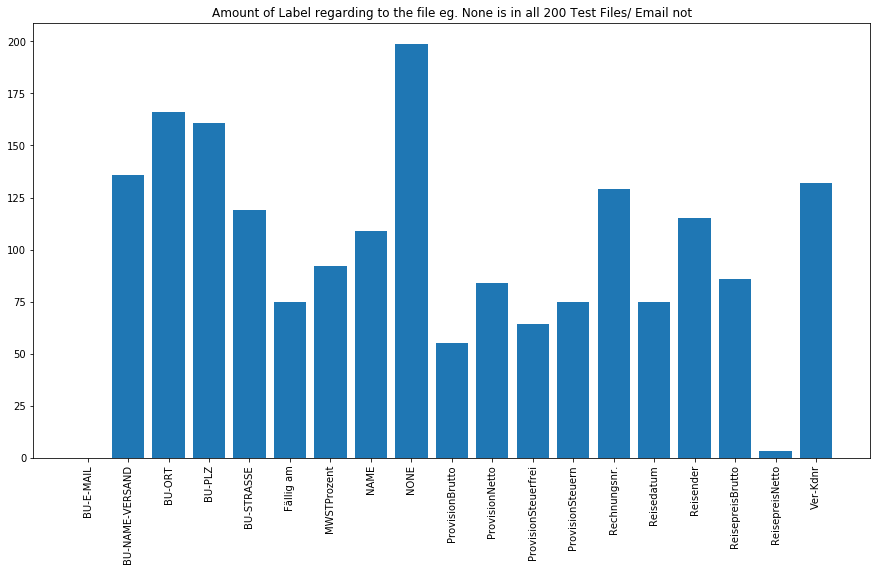

In [18]:
plt.figure(figsize=(15,8))
plt.bar(range(len(amount_of_label)), amount_of_label)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('Amount of Label regarding to the file eg. None is in all 200 Test Files/ Email not')
pass

### Amount of Labels Total

In [19]:
c = Counter()

In [20]:
for i in range(len(real)):
    c.update(real[i])

In [21]:
tmp = []
for k in c.keys():
    tmp.append((db.labels[k], c[k]))
pandas.DataFrame(tmp, columns=['Label', 'Count'])

,Label,Count
0,BU-NAME-VERSAND,285
1,BU-ORT,244
2,BU-PLZ,190
3,BU-STRASSE,297
4,Fällig am,123
5,MWSTProzent,118
6,NAME,351
7,NONE,67051
8,ProvisionBrutto,71
9,ProvisionNetto,144


## Score About ALL Test Files

In [22]:
predicted_all_test_files = np.concatenate(predicted)
real_all_test_files = np.concatenate(real)

### <font style="color:red">Precision for all test Files<font>

In [23]:
precision_per_label = metrics.precision_score(y_true=real_all_test_files, y_pred=predicted_all_test_files, average=None)
np.mean(precision_per_label)

0.33888767980782203

### <font style="color:red">Recall for all test Files<font>

In [24]:
recall_per_label = metrics.recall_score(y_true=real_all_test_files, y_pred=predicted_all_test_files, average=None)
np.mean(recall_per_label)

C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.64561379518426631

### <font style="color:red">F1 Score for all test Files<font>

In [25]:
f1_per_label = metrics.f1_score(y_true=real_all_test_files, y_pred=predicted_all_test_files, average=None)
np.mean(f1_per_label)

C:\Keil_Programme\anaconda4\envs\tensor\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.42202450381071088

### Confusion Matrix

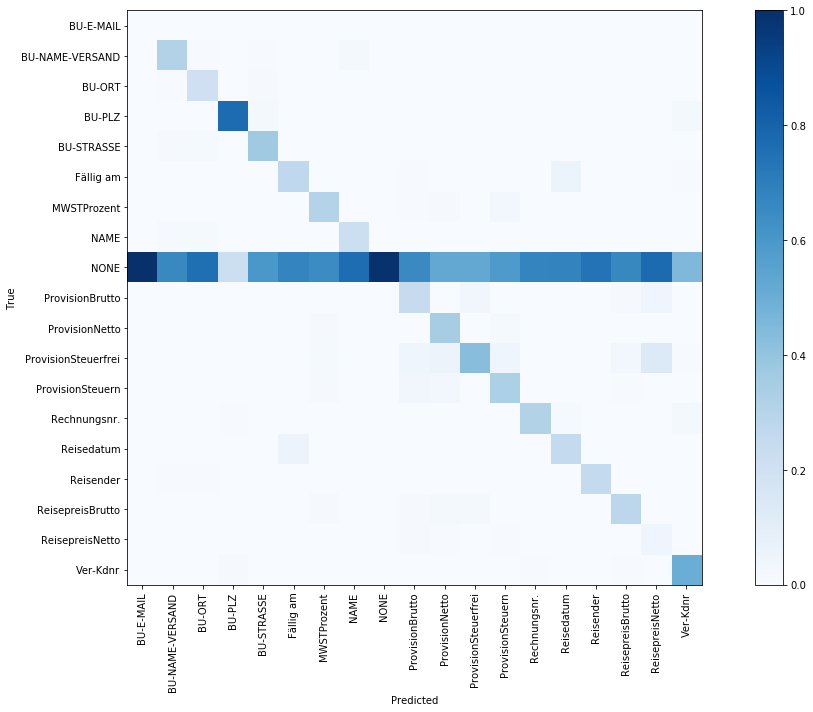

In [26]:
cc = metrics.confusion_matrix(real_all_test_files, predicted_all_test_files)
cc = cc / np.sum(cc, 0)
plt.figure(figsize=(15, 10))

plt.imshow(cc, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.colorbar()
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.yticks(np.arange(len(db.labels)), db.labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

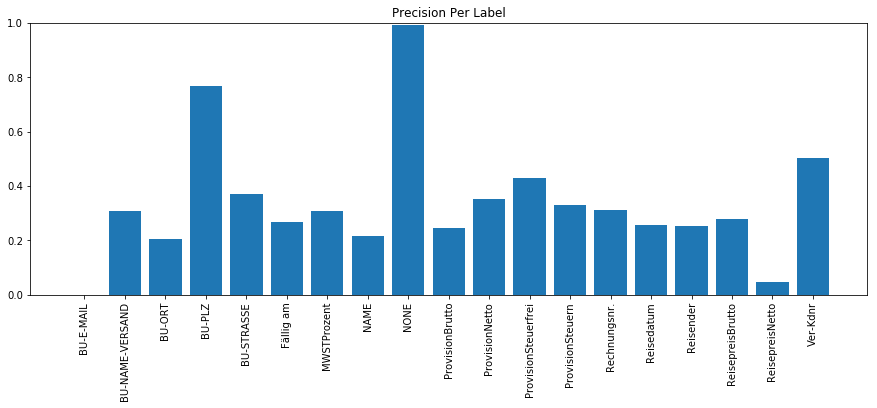

In [27]:
plt.figure(figsize=(15,5))
plt.bar(range(len(precision_per_label)), precision_per_label)
plt.ylim(0,1)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('Precision Per Label')

In [28]:
pandas.DataFrame(np.transpose([db.labels, precision_per_label]), columns=['Label', 'Precision'])

,Label,Precision
0,BU-E-MAIL,0
1,BU-NAME-VERSAND,0.309144
2,BU-ORT,0.204908
3,BU-PLZ,0.768868
4,BU-STRASSE,0.369723
5,Fällig am,0.268437
6,MWSTProzent,0.306502
7,NAME,0.216535
8,NONE,0.990686
9,ProvisionBrutto,0.245614


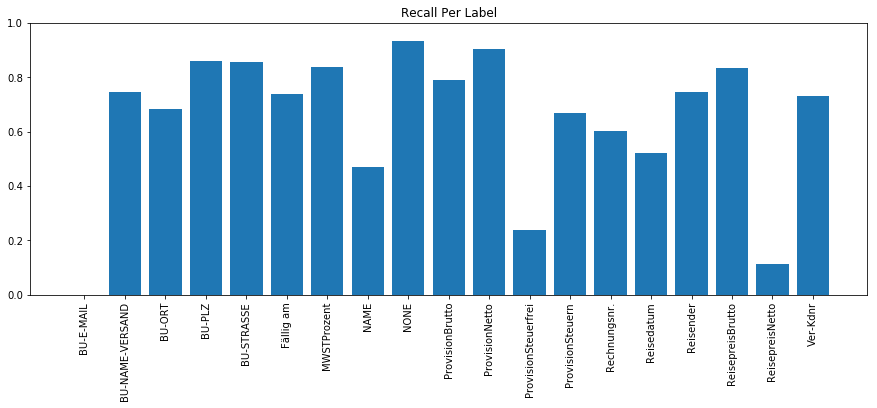

In [29]:
plt.figure(figsize=(15,5))
plt.bar(range(len(recall_per_label)), recall_per_label)
plt.ylim(0,1)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('Recall Per Label')

In [30]:
pandas.DataFrame(np.transpose([db.labels, recall_per_label]), columns=['Label', 'Recall'])

,Label,Recall
0,BU-E-MAIL,0
1,BU-NAME-VERSAND,0.747368
2,BU-ORT,0.684426
3,BU-PLZ,0.857895
4,BU-STRASSE,0.855219
5,Fällig am,0.739837
6,MWSTProzent,0.838983
7,NAME,0.470085
8,NONE,0.932753
9,ProvisionBrutto,0.788732


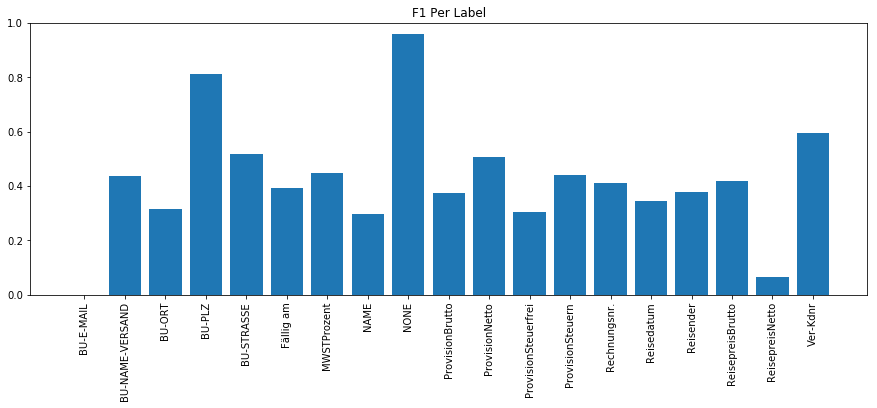

In [31]:
plt.figure(figsize=(15,5))
plt.bar(range(len(f1_per_label)), f1_per_label)
plt.ylim(0,1)
plt.xticks(np.arange(len(db.labels)), db.labels, rotation=90)
plt.title('F1 Per Label')

In [32]:
pandas.DataFrame(np.transpose([db.labels, f1_per_label]), columns=['Label', 'F1'])

,Label,F1
0,BU-E-MAIL,0
1,BU-NAME-VERSAND,0.437372
2,BU-ORT,0.315392
3,BU-PLZ,0.810945
4,BU-STRASSE,0.51626
5,Fällig am,0.393939
6,MWSTProzent,0.44898
7,NAME,0.296496
8,NONE,0.960847
9,ProvisionBrutto,0.374582
